# **Bank’s Customers Churn Prediction**

In this data science project, we embark on a journey to **predict bank's customers churn by classification model**. The stakes are high: retaining existing clients is far more **cost-effective** than acquiring new ones. By understanding the factors that drive clients to leave, we can **empower the bank** to take proactive measures.

Let’s break down our approach using the **CRISP-DM framework**:

1. **Define the Business Problem**: We start by clearly articulating the problem. In our case, it’s predicting whether a customer will churn (leave) the bank's services. Our target variable will be binary: 1 if the customer churned, and 0 otherwise.

2. **Collect and Explore Data**: Before diving into modeling, we need to gather relevant data and gain a holistic view of it. This step involves understanding the dataset’s structure, missing values, and initial patterns.

3. **Data Splitting**: We divide the data into training and test sets. The training set will be used to train our machine learning models, while the test set will evaluate their performance.

4. **Exploratory Data Analysis (EDA)**: Here’s where the magic happens! We explore the data, uncover hidden relationships, and identify trends. Our goal is to extract valuable insights about churners’ behavior from the available features. Even before building a model, we can provide the bank with actionable profiles and tendencies.

Now, let’s delve into each step:

- **Define the Business Problem**: We’ve already established our objective: predicting churn. But it’s essential to understand the business context. What are the implications of churn for the bank? How does it impact revenue, customer satisfaction, and overall business health? Authentic comments and insights here will set the stage for our analysis.

- **Collect and Explore Data**: Data quality matters. We’ll assess the completeness, accuracy, and relevance of our dataset. Are there any biases? What features are available? A thorough exploration will guide our subsequent decisions.

- **Data Splitting**: Splitting the data ensures we have a separate set for model evaluation. We’ll discuss the trade-offs between train-test splits and cross-validation.

- **EDA**: This step is our treasure hunt. We’ll visualize distributions, correlations, and anomalies. Are there specific features strongly associated with churn? Are there patterns across customer segments?

By the end of this **notebook**, we’ll have a **solid foundation**. Armed with **insights**, we’ll proceed to **feature engineering, model training, and fine-tuning**. But for now, let’s explore the data and uncover its secrets! 🕵️‍♀️🔍

# **1. Business Problem**

Bank’s Customers Churn Prediction

In the dynamic world of **banking**, where customer **loyalty** is paramount, our **mission is clear**: **predict churn and empower the bank to retain your customers**. Let’s dive into the intricacies of this **predictive classification project**.

**1.1 Context: The Churn Challenge**

Our protagonist is a concerned **bank manager** witnessing an unsettling trend: a **growing exodus of customers**. The stakes are high, and the manager seeks answers. How can we **anticipate customer churn**? How can we transform potential departures into loyal, satisfied clients?

**1.2 Key Performance Indicators (KPIs)**

When a bank welcomes a **new customer**, three critical **KPIs** come into play:

- **Customer Acquisition Cost (CAC)**: This metric quantifies the expenses incurred in acquiring each credit card customer. It encompasses marketing efforts, sales processes, and associated costs. A lower CAC signifies efficient customer acquisition.
- **Customer Lifetime Value (CLV)**: CLV estimates the total revenue the bank can extract from a credit card customer over their entire relationship. A higher CLV implies that the customer’s value outweighs the acquisition cost, ensuring long-term profitability.
- **Churn Rate**: Expressed as a percentage, churn rate represents the number of credit card customers who bid farewell during a specific period. It’s the departure gate for our analysis.

**1.3 Our Mission: Maximizing Profitability**

Our compass points toward **profitability**. To achieve this, we must:

- **Predict Churn**: By building a robust **machine learning model**, we’ll forecast which customers are likely to churn. Armed with this knowledge, the **bank can proactively engage with these customers**, offering tailored services and reversing their decisions.
- **Leverage Insights**: Even before constructing our model, we’ll embark on **exploratory data analysis (EDA)**. This detective work will reveal **hidden patterns, churner profiles, and behavioral tendencies**. Our insights will guide subsequent steps.

**1.4 Unveiling the Benefits: Safeguarding Revenue, Precision Marketing, and Cost Efficiency**

Our journey isn’t just about predicting churn; it’s about unlocking **strategic advantages** for the bank. Let’s delve into the tangible **benefits** that await us:

1. **Revenue Protection**: Every departing customer takes a slice of potential revenue with them. By identifying churners early, we can intervene, retain their loyalty, and safeguard the bank’s bottom line. It’s like plugging leaks in a financial vessel.
2. **Precision Marketing**: Armed with insights, the bank can tailor its marketing efforts. Instead of casting a wide net, we’ll focus on the right audience—the ones teetering on the edge of churn. Personalized offers, timely communication, and targeted campaigns become our arsenal.
3. **Cost Savings**: Acquiring new customers is expensive. By retaining existing ones, we reduce the need for aggressive acquisition strategies. Our predictive model becomes a cost-efficient shield against customer attrition.
Remember, our mission isn’t just about numbers; it’s about empowering the bank to thrive in a competitive landscape. Let’s turn churn into loyalty, one prediction at a time! 🌟💰🔍



### **Importing the libraries and setting the palette color** 

In [2]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
from src.eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7"]
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.7019607843137254, 0.0, 0.0),
 (0.48627450980392156, 0.06666666666666667, 0.34509803921568627),
 (0.26666666666666666, 0.12941176470588237, 0.6862745098039216),
 (0.10196078431372549, 0.3254901960784314, 1.0),
 (0.050980392156862744, 0.5333333333333333, 0.9019607843137255),
 (0.0, 0.7176470588235294, 0.7803921568627451)]

# **2. Collect and Understand the Data**

- The dataset used in this project was collected from kaggle: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

- It contains bank's customers data, with demographic, personal, financial and product informations. It is already labeled, with churners identified as 1 and non-churners identified as 0 in the attrition flag variable.

In [3]:
#Importing the dataset
data_path = '../input/Customer-Churn-Records.csv'
customers_df = pd.read_csv(data_path)

In [4]:
customers_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


### Dataset Dictionary

**1. RowNumber:** corresponds to the record (row) number and has no effect on the output.

**2. CustomerId:** contains random values and has no effect on customer leaving the bank.

**3. Surname:** the surname of a customer has no impact on their decision to leave the bank.

**4. CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**5. Geography:** a customer’s location can affect their decision to leave the bank.

**6. Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**7. Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**8. Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**9. Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**10. NumOfProducts:** refers to the number of products that a customer has purchased through the bank.

**11. HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**12. IsActiveMember:** active customers are less likely to leave the bank.

**13. EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**14. Exited:** whether or not the customer left the bank.

**15. Complain:** customer has complaint or not.

**16. Satisfaction Score:** Score provided by the customer for their complaint resolution.

**17. Card Type:** type of card hold by the customer.

**18. Points Earned:** the points earned by the customer for using credit card.

In [5]:
#information about dataset
customers_df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
#Shape of customers dataset
print(f'The dataset has {customers_df.shape[0]} rows and {customers_df.shape[1]} columns.')

The dataset has 10000 rows and 18 columns.


In [7]:
# some descriptive statistics
customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Some insights about customers dataset:

1. Credit Score values are concentrated between 584.0 (fisrt quartile) and 718.0 (third quartile), also we can assume that exists min/max limit values (between 350.0 and 850.0).

2. The average age is 39 years, it indicates an older profile.

3. On average, customers held approximately 2 products bank.

4. 50% of the customers remained bank customers for 5 years.

5. 70% of the customers have credit card, which is a good signal.

6. The average salary is US$ 100090.0 and the average balance is US$ 76486.0.

7. 20% of the customers have already made a complaint, probably unsatisfied.

In [8]:
# Look for missing values
print('Missing values:')
print(customers_df.isna().sum())

# Look for duplicated values
print(f'\n Duplicated values: {customers_df.duplicated().sum()}.')

Missing values:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

 Duplicated values: 0.


There are no missing or duplicated values.

- I will drop the 'RowNumber', 'CustomerId' and 'Surname' variables because it have an unique value for each record, not being useful for the analysis.

- I will rename the columns in a standard format in order to turn the data manipulation easier. Moreover, exited will be renamed as churn_flag for interpretation purposes.

- I will express Gender variable as binary. This will make eda easier, like when looking at percentual values.

In [9]:
customers_df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

customers_df.columns = [x.lower() for x in customers_df.columns]

customers_df['gender'] = customers_df['gender'].map({'Male': 1, 'Female': 0})

customers_df.rename(columns={'exited': 'churn_flag'}, inplace=True)

customers_df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn_flag,complain,satisfaction score,card type,point earned
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# **3. Split the dataframe into train set and test set**

- To begin, I’ll divide the dataset into two parts: a training set and a testing set. The testing set should consist of data that the model has not been exposed to during training. 

- I’ll concentrate my exploratory data analysis (EDA) on the training set to prevent data leakage, ensure a realistic representation, and accurately evaluate the model with fresh, unseen data. I’ll use the stratify=y parameter in the train_test_split function to make sure that the proportion of each target class is the same in both the training and testing sets. This approach is especially beneficial when dealing with imbalanced datasets, like in our case, where there are more existing customers than attrited ones.

In [10]:
X = customers_df.drop(columns=['churn_flag'])
y = customers_df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8500, 14).
Train target dataset shape: (8500,).
Test predictor dataset shape: (1500, 14).
Test target dataset shape: (1500,).


In [11]:
# churn proportion in each set

print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')



Train target proportion: 
churn_flag
0    0.796235
1    0.203765
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.796
1    0.204
Name: proportion, dtype: float64


# **4. EDA: Exploratory Data Analysis**

I’ll delve into the training set to gain a deeper understanding of the individual distribution of the features, their interrelationships, correlations, trends, and potential insights from the data, particularly in relation to the target variable (churn_flag). This will involve conducting univariate, bivariate, and multivariate analyses of the data.

I’ll also obtain a complete training set, including both predictor and target features, to utilize the ‘hue’ parameter in Seaborn for visualizations and to examine the correlation matrix. This will provide a comprehensive view of the data and help identify patterns and relationships that may not be immediately apparent. This is a crucial step in the data analysis process as it can inform the selection of appropriate modeling techniques and feature engineering strategies.

In [12]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,complain,satisfaction score,card type,point earned,churn_flag
151,535,France,0,48,9,0.0,1,1,0,149892.79,1,4,GOLD,697,1
3608,677,France,0,36,7,0.0,1,1,0,47318.75,0,5,SILVER,784,0
7490,654,France,0,35,2,90865.8,1,1,1,86764.46,0,5,GOLD,647,0
4627,605,France,1,39,7,0.0,1,0,1,119348.28,0,4,DIAMOND,307,0
8473,770,France,0,33,6,0.0,2,1,1,126131.90,0,2,DIAMOND,497,0


In [13]:
# Creating list for categorical, numerical and target features

numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'churn_flag'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')  

There are 12 numerical features. They are: 
['creditscore', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'complain', 'satisfaction score', 'point earned']

There are 2 categorical features. They are: 
['geography', 'card type']

The target feature is: churn_flag.


In [14]:
# unique values in categorical features (Cardinality)

for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

geography
----------------------------------------
There are 3 unique values. They are: 
geography
France     0.499529
Germany    0.250588
Spain      0.249882
Name: proportion, dtype: float64

card type
----------------------------------------
There are 4 unique values. They are: 
card type
GOLD        0.253529
PLATINUM    0.250000
DIAMOND     0.248824
SILVER      0.247647
Name: proportion, dtype: float64



- card type present ordinal relationship. Thus, OrdinalEncoder might be a good choice for encoding them.

- geography doesn't present ordinal relationship. Thus, OneHotEncoder might be a good choice for encoding them.

### **Univariate Analysis**

I will make univariate analysis for each feature, I want to see which are typical values for the bank's customers for each feature.

##### **Target Distribution**

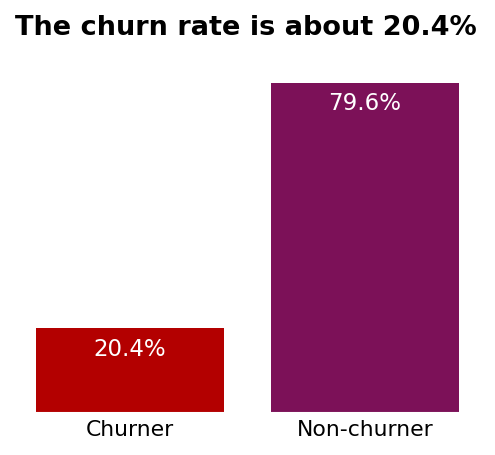

In [15]:
# Group the data by churn flag.
churn_grp = train.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))
        
# Plot the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=["#b30000", "#7c1158"])
        
# Customize the plot.
ax.set_title('The churn rate is about 20.4%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')

The objective is skewed, with 20.4% of the clientele being prone to churn. To address this, I will implement several tactics:

1. Employ stratified hold-out and k-fold cross-validation to ensure the proportion of the objective is preserved in test and validation sets, even during hyperparameter optimization.
2. Assign varying class weights to instances of the majority and minority classes. The goal is to assign greater weights to the minority class, so the model incurs a penalty when it incorrectly classifies a customer who churns. These weights are determined by the model-specific hyperparameter for it.
3. If needed, consider the precision-recall trade-off. The primary goal here is to forecast churn probabilities, not a binary prediction. This allows the bank to make more informed decisions. Rather than merely determining if a client will churn or not, it can assess the likelihood of the client discontinuing the service.

### **Numerical Feature Distribuitions**

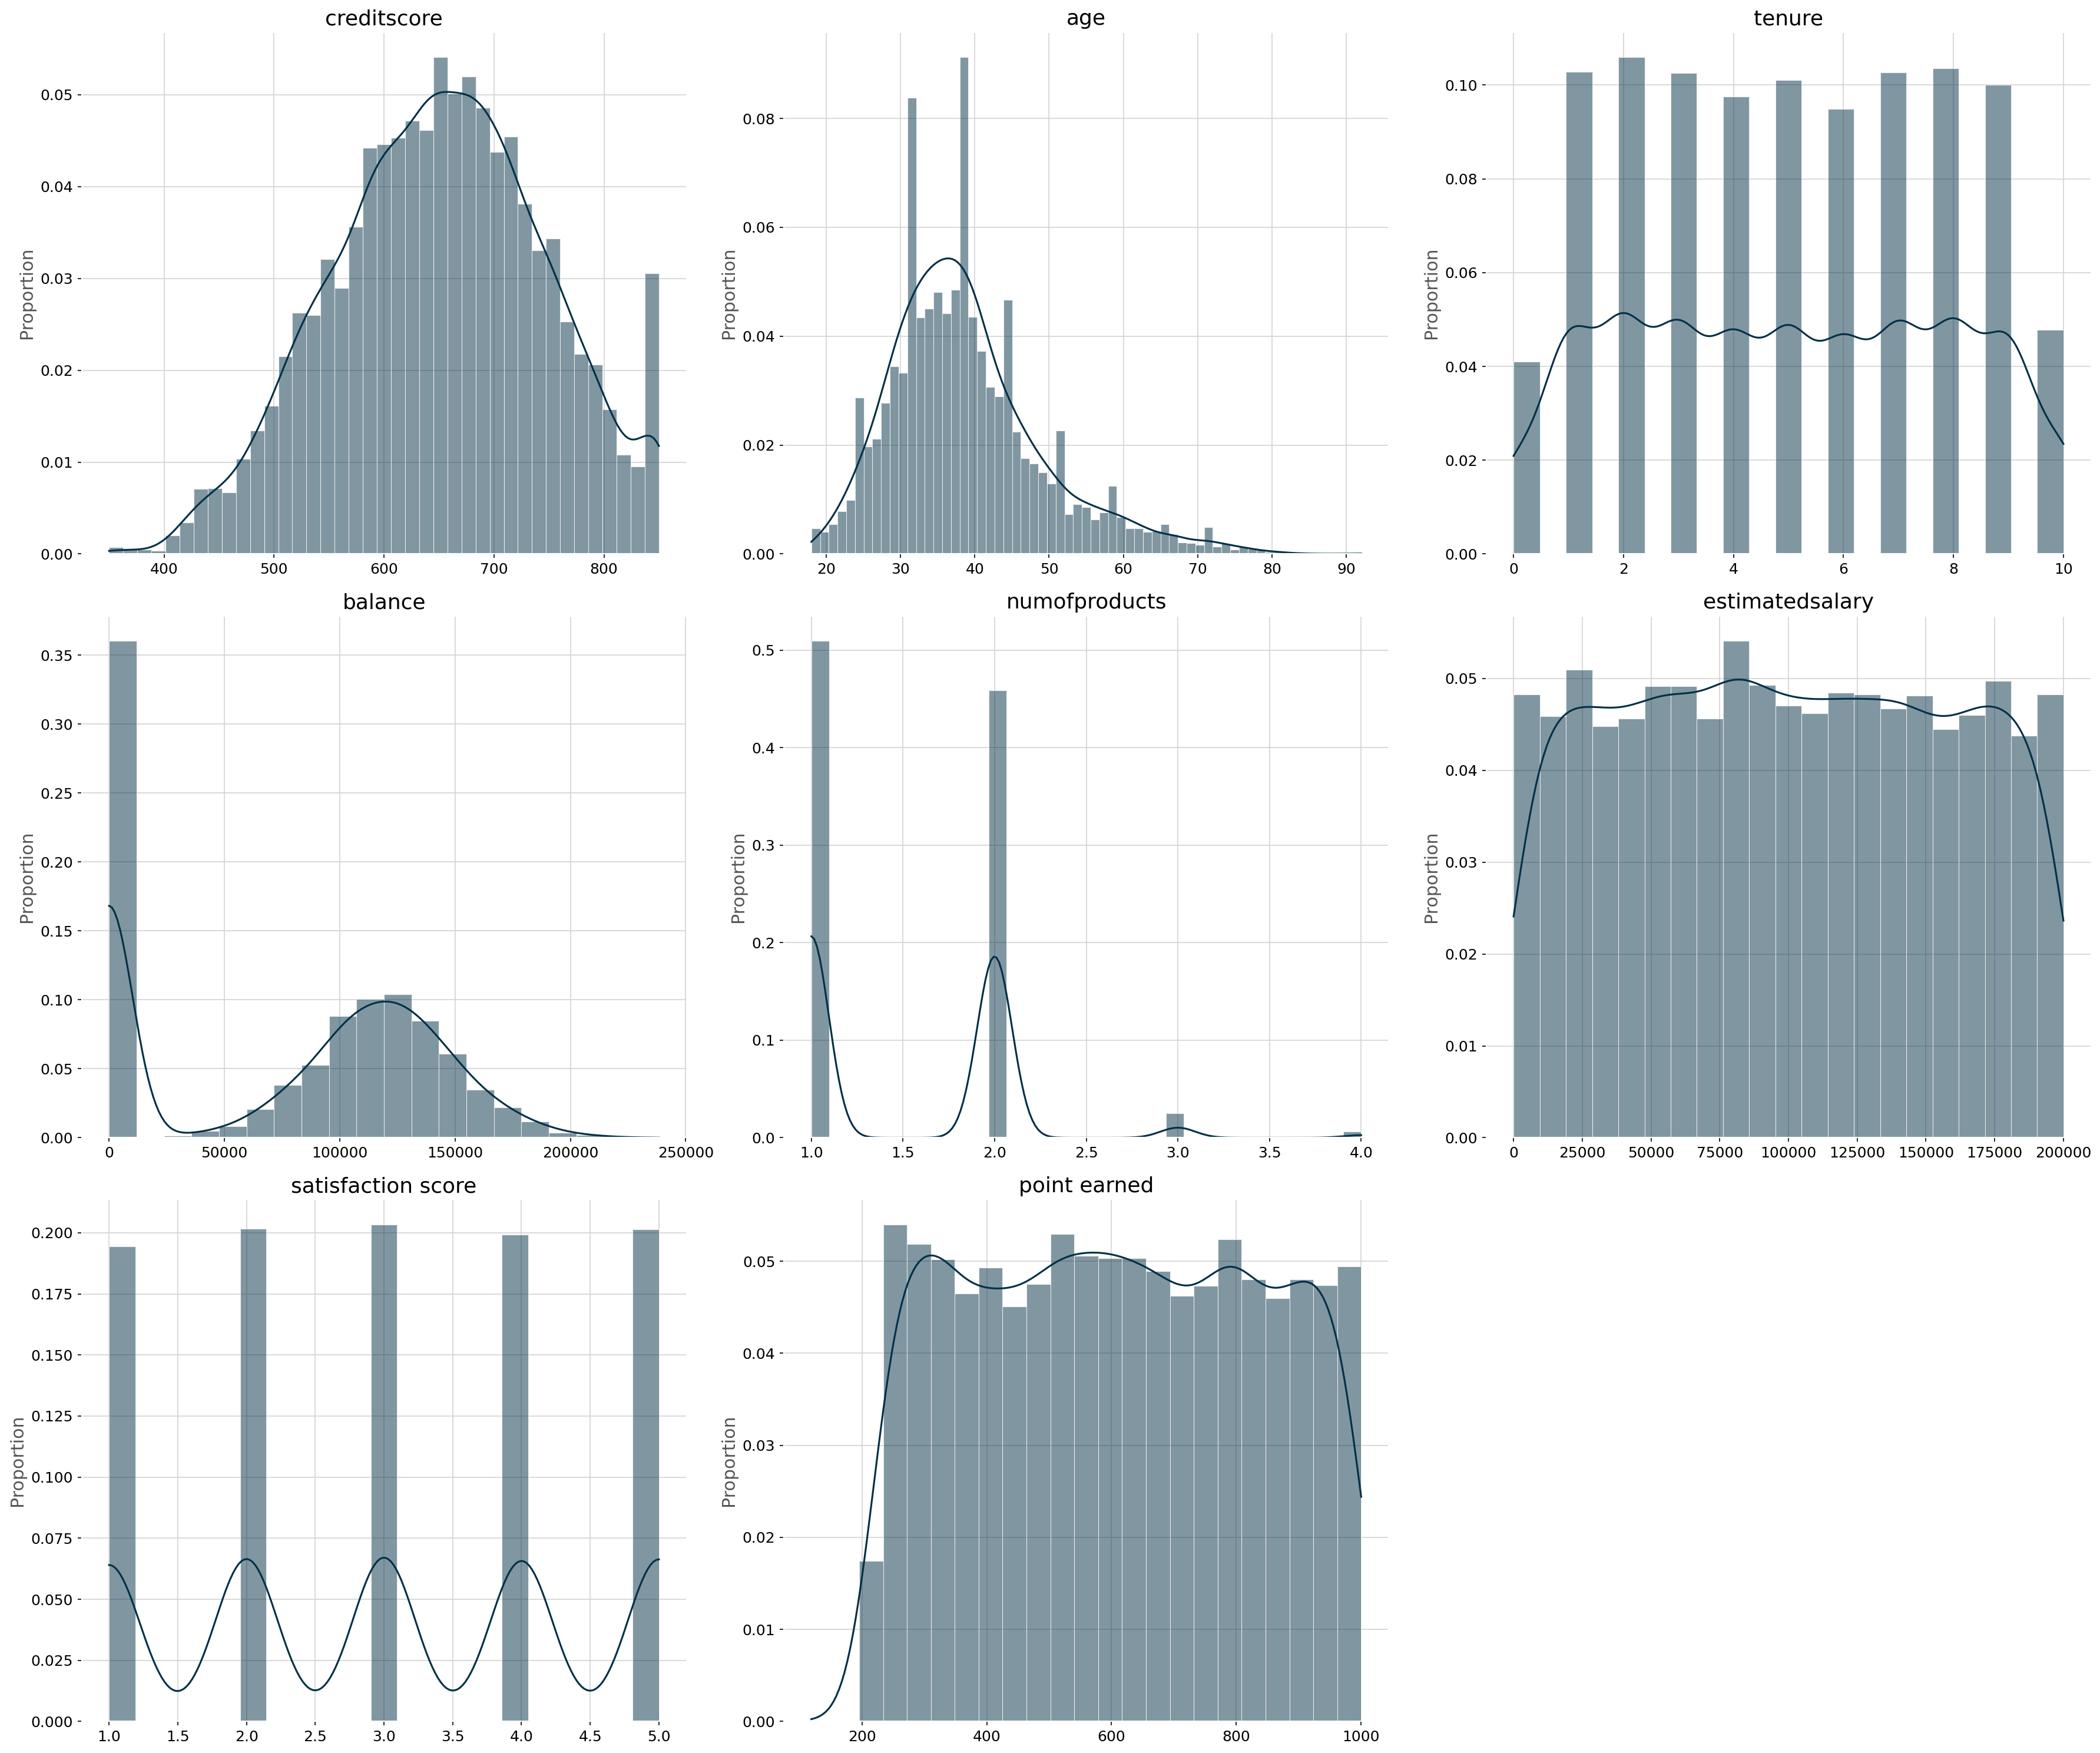

In [20]:
feature_numplot = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary', 'satisfaction score', 'point earned']

analysis_plots(data=train, features=feature_numplot, kde=True, figsize=(24, 20))